Starting off with importing the necessary packages, libraries, and our training and testing data, as well as preparing the data for analysis (dropping the Id columns and setting the training prediction up).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp

from sklearn import linear_model
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

import seaborn as sns
import missingno as msno

C:\Users\Izzy\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Izzy\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
from sklearn.metrics import f1_score, classification_report
#f1_score(y_true, y_predicted, average = 'macro')

In [3]:
train= pd.read_csv("C:/Users/Izzy/Desktop/213R/HW4/train.csv/train.csv")
test= pd.read_csv("C:/Users/Izzy/Desktop/213R/HW4/test.csv/test.csv")
y_train=train['Target']
train.drop(columns = 'Id', inplace=True)

In [71]:
train.drop(columns = 'Target', inplace=True)

In [62]:
test.drop(columns = 'Id', inplace=True)

Now I take a look at the data, getting a feel for the features, their values, and where the missing data is. 

In [4]:
print(test.shape)
print(train.shape)

(23856, 142)
(9557, 142)


In [5]:
train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,NaN,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,NaN,0,8,0,1,1,0,NaN,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


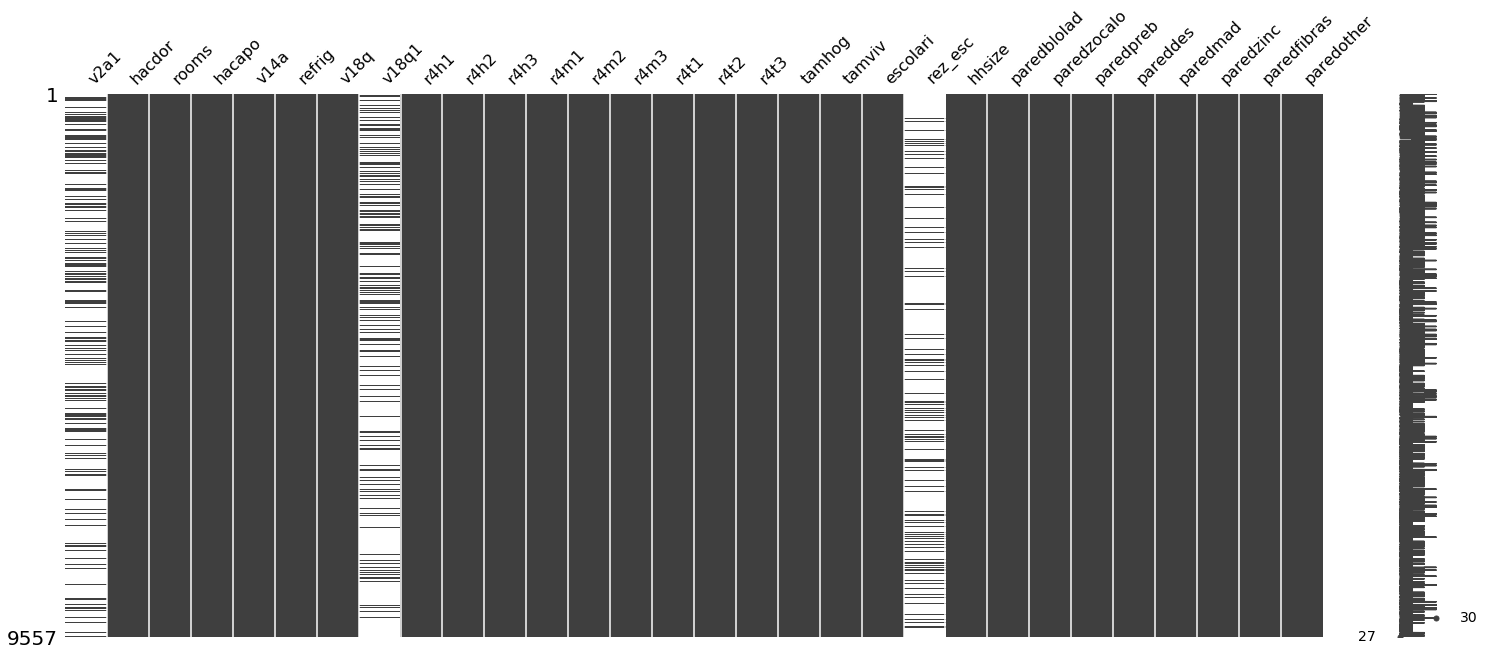

In [6]:
msno.matrix(train.iloc[:,0:30])

I zoomed in on the missing number visual above because really only these 3 columns had substantial missing data.  Looks like the troubled columns are monthly rent payment, number of tablets owned by the household, and years behind in school.  

From the exact numbers of missing values in each column summed below, it looks like mean education level of adults in the household and it's square have a few missing points, but not nearly comparable to the other three columns listed above.

It would take awhile of analysis before I accepted that I had to fill in this data, rather than ignoring it.  Way down near the bottom I finally filled these in and imputed missing values, but for now, I filled in the number of tablets.  This data was easily available- all the observations with missing number of tablets indicated in v18q that they do not own tablets.

In [7]:
train['v18q1'].fillna("0", inplace=True)

In [66]:
test['v18q1'].fillna("0", inplace=True)

In [8]:
sumMissing = train.isnull().sum()
#sumMissingtest = test.isnull().sum()
sumMissing.sort_values(ascending = False)

rez_esc            7928
v2a1               6860
SQBmeaned             5
meaneduc              5
public                0
sanitario2            0
sanitario1            0
coopele               0
noelec                0
planpri               0
abastaguafuera        0
abastaguano           0
sanitario5            0
abastaguadentro       0
cielorazo             0
techootro             0
techocane             0
techoentrepiso        0
sanitario3            0
sanitario6            0
pisomadera            0
elimbasu5             0
etecho2               0
etecho1               0
epared3               0
epared2               0
epared1               0
elimbasu6             0
elimbasu4             0
energcocinar1         0
                   ... 
parentesco2           0
parentesco1           0
estadocivil7          0
estadocivil6          0
estadocivil4          0
instlevel2            0
estadocivil3          0
estadocivil2          0
estadocivil1          0
female                0
male            

Here I create a simple copy of the training data to try my first models on.  This was a quick clipping down, dropping object variables and those with substantial missing variables.  As I mentioned, I eventually realized this strategy was innefective, but seeing the process is valuable.

In [9]:
prelim=train.copy()
prelim.drop(columns = 'Target', inplace=True)
prelim.drop(columns = 'dependency', inplace=True)
prelim.drop(columns = 'idhogar', inplace=True)
prelim.drop(columns = 'edjefe', inplace=True)
prelim.drop(columns = 'edjefa', inplace=True)

In [10]:
prelim.drop(columns = 'v2a1', inplace=True)
prelim.drop(columns = 'rez_esc', inplace=True)
prelim.drop(columns = 'meaneduc', inplace=True)
prelim.drop(columns = 'SQBmeaned', inplace=True)

In [11]:
prelim.head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,...,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,agesq
0,0,3,0,1,1,0,0,0,1,1,...,0,43,100,1849,1,100,0,1.000000,0.0,1849
1,0,4,0,1,1,1,1,0,1,1,...,0,67,144,4489,1,144,0,1.000000,64.0,4489
2,0,8,0,1,1,0,0,0,0,0,...,0,92,121,8464,1,0,0,0.250000,64.0,8464
3,0,5,0,1,1,1,1,0,2,2,...,0,17,81,289,16,121,4,1.777778,1.0,289
4,0,5,0,1,1,1,1,0,2,2,...,0,37,121,1369,16,121,4,1.777778,1.0,1369


And here I began my first model.  I was impatient to get into it, and decided to start with the most rudimentary of classification models we had learned- the logistic regression.  

I used gridsearch to determine the best parameters for the multinomial model, the c value and the tolerance level, and used my cropped feature set to train it. 

In [13]:
lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=42, max_iter=500)
gridpre = GridSearchCV(lr, {"C": [0.2, 0.7, 1.2], "tol": [.0001, .001, .1]})
gridpre.fit(prelim, y_train)


C:\Users\Izzy\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Izzy\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Izzy\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Izzy\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Izzy\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Izzy\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: 

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.2, 0.7, 1.2], 'tol': [0.0001, 0.001, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [14]:
print(gridpre.best_params_)

{'C': 0.2, 'tol': 0.0001}


In [15]:
mlr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=42, max_iter=500, C=0.2, tol=.0001)
mlr.fit(prelim, y_train)

C:\Users\Izzy\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Izzy\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Izzy\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
sorted(list(zip(prelim, mlr.coef_[0])), key=lambda x: x[1])

[('v18q', -0.7862487562735865),
 ('parentesco4', -0.687172405751797),
 ('sanitario6', -0.5669984864972549),
 ('tipovivi3', -0.44179944307762736),
 ('energcocinar2', -0.4179483162517509),
 ('pareddes', -0.3936780794801513),
 ('estadocivil6', -0.3169006070488165),
 ('television', -0.30387830812852173),
 ('qmobilephone', -0.288185506754665),
 ('refrig', -0.27630998577561944),
 ('parentesco6', -0.2662506637822357),
 ('instlevel3', -0.25063387309952206),
 ('etecho3', -0.2261696003497325),
 ('abastaguano', -0.22099386504399185),
 ('pisonatur', -0.2141825640604361),
 ('eviv1', -0.20246330545246388),
 ('elimbasu4', -0.1950590224553142),
 ('energcocinar3', -0.19292606264625473),
 ('estadocivil1', -0.1829234625262045),
 ('epared3', -0.17460183236459265),
 ('noelec', -0.1459645313581108),
 ('r4h2', -0.14299293782025904),
 ('area2', -0.14246963194944673),
 ('lugar6', -0.12657850703663515),
 ('tipovivi2', -0.12090342240605312),
 ('SQBovercrowding', -0.1204387961801717),
 ('tipovivi5', -0.1194207101

In [17]:
train_predictions = mlr.predict(prelim)

In [18]:
import pprint
from sklearn.metrics import precision_recall_fscore_support

In [24]:
print("Train:")
pprint.pprint(precision_recall_fscore_support(y_train, train_predictions))

Train:
(array([0.54518072, 0.46872753, 0.51875   , 0.73937972]),
 array([0.2397351 , 0.4082655 , 0.06865178, 0.94629753]),
 array([0.33302668, 0.43641232, 0.12125639, 0.83013899]),
 array([ 755, 1597, 1209, 5996], dtype=int64))


Well, this preliminary model was not very good at predicting poverty, but fairly accurate in it's prediction of families not at risk.  

As you can also tell by the line convergence warnings, the model wasn't the best suited for the data set. It was interesting to see the coefficients and values it still was able to produce.  

For the next model, I switched over to a onevsrest classification strategy for the logistic regression.

In [19]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
ovr = linear_model.LogisticRegression(multi_class='ovr', solver='newton-cg', random_state=42, max_iter=500, C=0.2, tol=.0001)
ovr.fit(prelim, y_train)
sorted(list(zip(prelim, ovr.coef_[0])), key=lambda x: x[1])

In [36]:
train_predictions2 = ovr.predict(prelim)
print("Train:")
pprint.pprint(precision_recall_fscore_support(y_train, train_predictions2))

Train:
(array([0.56809339, 0.46250876, 0.53977273, 0.73859945]),
 array([0.19337748, 0.41327489, 0.07857734, 0.94813209]),
 array([0.28853755, 0.43650794, 0.13718412, 0.83035127]),
 array([ 755, 1597, 1209, 5996], dtype=int64))


This model wasn't much better on the precision, recall, and fscore scoring, so I decided to see if there would be a difference if I scaled the data first. 

In [16]:
#from sklearn.preprocessing import StandardScaler

In [17]:
#scaler = StandardScaler()
#prelim_std = scaler.fit_transform(prelim)

In [39]:
ovrs = linear_model.LogisticRegression(multi_class='ovr', solver='newton-cg', random_state=42, max_iter=500, C=0.2, tol=.0001)
ovrs.fit(prelim_std, y_train)
sorted(list(zip(prelim_std, ovrs.coef_[0])), key=lambda x: x[1])

[(array([-1.98985789e-01,  3.02866550e-02, -1.55628856e-01,  7.25209117e-02,
          2.10363073e-01,  1.82062426e+00,  3.83683371e+00,  9.02109730e-01,
          4.25296889e-01,  8.87401088e-01, -5.76502004e-01, -7.09230043e-01,
         -8.79603563e-01,  2.05174453e-01, -1.53294627e-01, -3.36750271e-03,
          5.31406759e-04,  1.01549846e+00, -1.31066546e+00,  5.31406759e-04,
         -1.20960503e+00, -2.90340676e-01, -4.81219456e-01, -9.30287781e-02,
          2.76565883e+00, -1.15120617e-01, -3.83020092e-02, -3.83020092e-02,
         -1.50170203e+00, -5.35529118e-01, -3.07018856e-02, -3.23643239e-02,
         -1.29236712e-01,  3.76428496e+00,  1.75638503e-01, -1.34170430e-01,
         -5.61154622e-02, -4.69274036e-02,  6.90081548e-01,  1.91183096e-01,
         -1.80949158e-01, -5.97520165e-02,  3.60281247e-01, -1.77201751e-02,
         -4.69274036e-02, -3.53012120e-01, -6.23422379e-02,  1.91659845e+00,
         -1.80052761e+00, -1.24986716e-01, -5.01753978e-02, -4.34395010e-02,

In [40]:
train_predictions3 = ovrs.predict(prelim_std)
print("Train:")
pprint.pprint(precision_recall_fscore_support(y_train, train_predictions3))

Train:
(array([0.57460317, 0.47256767, 0.54385965, 0.74212109]),
 array([0.2397351 , 0.40450845, 0.1025641 , 0.94646431]),
 array([0.33831776, 0.43589744, 0.17258177, 0.83192846]),
 array([ 755, 1597, 1209, 5996], dtype=int64))


In [41]:
f1_score(y_train, train_predictions3, average = 'macro')

0.44468135549004745

Wow, so neither of those logistic regression models- the simple multinomial and the one-vs-rest produced accurate predictions- though the scaled model fared somewhat better.  Those are some pretty abysmal precision, recall, and f1 scores. But I did those more as a test, without paring down the features considered and just throwing in as many as possible.  Now that has proven ineffective, it's time to move on to some more sophisticated models.

First, some feature engineering.  

Though I already adjusted the number of tablets per household feature to represent missing data as the true value of zero- as determined by the previous question in which each household is asked whether or not they own a tablet- it disturbed me that another data with significant string values was the head of household's education level.  That seems potentially significant, and simply dropping it doesn't seem very analytically sound.  

Instead, I'm going to combine the female and male head of household education levels into a single feature representing head of household education.  This may place more weight on the gender feature, but that shouldn't pose a problem.  

In [20]:
hheduc=train['edjefe'].copy()
hheduc.head()

0    10
1    12
2    no
3    11
4    11
Name: edjefe, dtype: object

In [21]:
hheduc= hheduc.replace('no', train['edjefa'])

In [22]:
hheduc= hheduc.replace('no', train['escolari']) #fill in double no's with individual's years of schooling
#print(hheduc.str.contains('yes').sum())
hheduc= hheduc.replace('yes', train['escolari'])
train['hheduc']=hheduc
print(hheduc)

0       10
1       12
2       11
3       11
4       11
5       11
6       11
7        9
8        9
9        9
10       9
11      11
12      11
13       4
14       4
15      10
16      10
17      10
18      10
19      15
20      15
21       4
22       4
23       6
24       6
25       6
26      15
27       6
28       6
29       6
        ..
9527     8
9528    16
9529     6
9530     6
9531     5
9532     5
9533     5
9534     4
9535     5
9536     5
9537     5
9538     5
9539     5
9540     2
9541     2
9542     2
9543     2
9544     2
9545     2
9546     2
9547     2
9548     2
9549     2
9550     6
9551     0
9552     9
9553     9
9554     9
9555     9
9556     9
Name: edjefe, Length: 9557, dtype: object


I then tried to implement another model, the soft margin classifier, but after several instances of giving it hours to run and it never finishing, I decided to abandon this model.  Still looks good chilling here though

In [23]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [ ]:
svc = SVC()
gridsvc = GridSearchCV(svc, {"C": [0.2, 0.5, 0.7], "kernel": ['linear', 'poly', 'rbf'], 
                                'degree': [1, 2, 3], 'gamma': [1, 5, 11]}, scoring='accuracy')
gridsvc.fit(pared2, y_train)
print("Best Params: {}".format(gridsvc.best_params_))

And so I moved on to a random forest model, which I expected to be the most accurate.  I also began by creating an even more pared down set of features that eliminated some of the continous variables that would give the tree model trouble, as well as superfluous or repetetive features.

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
pared = prelim.copy()
pared.drop(columns = 'v18q', inplace=True)
pared.drop(columns = 'tamhog', inplace=True)
pared.drop(columns = 'hhsize', inplace=True)
pared.drop(columns = 'escolari', inplace=True)
pared.drop(columns = 'mobilephone', inplace=True)
pared.drop(columns = 'SQBescolari', inplace=True)
pared.drop(columns = 'SQBage', inplace=True)
pared.drop(columns = 'SQBhogar_total', inplace=True)
pared.drop(columns = 'SQBedjefe', inplace=True)
pared.drop(columns = 'SQBhogar_nin', inplace=True)
pared.drop(columns = 'SQBovercrowding', inplace=True)
pared.drop(columns = 'SQBdependency', inplace=True)
pared.drop(columns = 'agesq', inplace=True)

In [32]:
pared.head(20)

,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4h1,r4h2,r4h3,r4m1,...,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age
0,0,3,0,1,1,0,0,1,1,0,...,1,1,0,0,0,0,0,1,0,43
1,0,4,0,1,1,1,0,1,1,0,...,1,1,0,0,0,0,0,1,0,67
2,0,8,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,92
3,0,5,0,1,1,1,0,2,2,1,...,3,1,0,0,0,0,0,1,0,17
4,0,5,0,1,1,1,0,2,2,1,...,3,1,0,0,0,0,0,1,0,37
5,0,5,0,1,1,1,0,2,2,1,...,3,1,0,0,0,0,0,1,0,38
6,0,5,0,1,1,1,0,2,2,1,...,3,1,0,0,0,0,0,1,0,8
7,1,2,0,1,1,0,0,1,1,2,...,1,1,0,0,0,0,0,1,0,7
8,1,2,0,1,1,0,0,1,1,2,...,1,1,0,0,0,0,0,1,0,30
9,1,2,0,1,1,0,0,1,1,2,...,1,1,0,0,0,0,0,1,0,28


Again I used gridsearch to test for the best parameters for the model, running several different sets of parameters to narrow down to the true best. 

In [20]:
n_estimators = [100, 250, 500]
max_depth = [5, 10, 15]
class_weights = ['balanced', None]
best_f1 = 0

for est in n_estimators:
    for depth in max_depth:
        for wgt in class_weights:
            print(est, depth, wgt)
            rf = RandomForestClassifier(n_estimators=est, max_depth=depth, oob_score=True, class_weight=wgt)
            rf.fit(pared, y_train)
            f1 = f1_score(y_train, np.argmax(rf.oob_decision_function_ , 1), average='micro')
            if f1 > best_f1:
                best_f1 = f1
                best_params = (est, depth, wgt)

100 5 balanced
100 5 None
100 10 balanced
100 10 None
100 15 balanced
100 15 None
250 5 balanced
250 5 None
250 10 balanced
250 10 None
250 15 balanced
250 15 None
500 5 balanced
500 5 None
500 10 balanced
500 10 None
500 15 balanced
500 15 None


In [24]:
n_estimators = [5000, 2500, 1000]
max_depth = [5, 10, 2]
class_weights = ['balanced', None]
best_f1 = 0

for est in n_estimators:
    for depth in max_depth:
        for wgt in class_weights:
            print(est, depth, wgt)
            rf = RandomForestClassifier(n_estimators=est, max_depth=depth, oob_score=True, class_weight=wgt)
            rf.fit(pared, y_train)
            f1 = f1_score(y_train, np.argmax(rf.oob_decision_function_ , 1), average='micro')
            if f1 > best_f1:
                best_f1 = f1
                best_params = (est, depth, wgt)

5000 5 balanced
5000 5 None
5000 10 balanced
5000 10 None
5000 2 balanced
5000 2 None
2500 5 balanced
2500 5 None
2500 10 balanced
2500 10 None
2500 2 balanced
2500 2 None
1000 5 balanced
1000 5 None
1000 10 balanced
1000 10 None
1000 2 balanced
1000 2 None


In [25]:
print("Best OOB F1: {}".format(best_f1))
print("Best params: {}".format(best_params))

Best OOB F1: 0.13163126504133096
Best params: (5000, 5, None)


Hi, I wasn't really satisfied with an F1 score of .13, but I wanted to see what the model was valuing. 

In [41]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, class_weight=None)
rf.fit(pared, y_train)
train_predictions4 = rf.predict(pared)
print(classification_report(y_train, train_predictions4))

             precision    recall  f1-score   support

          1       1.00      0.10      0.19       755
          2       0.56      0.21      0.30      1597
          3       1.00      0.02      0.03      1209
          4       0.67      0.99      0.80      5996

avg / total       0.72      0.67      0.57      9557



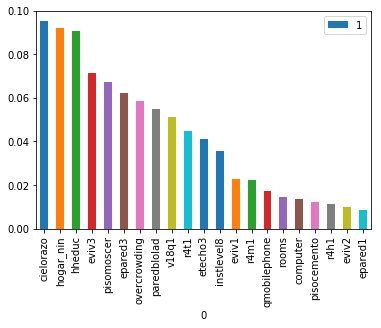

In [66]:
feature_names = pared.columns
feature_imp = sorted(list(zip(feature_names, rf.feature_importances_)), key=lambda x: x[1], reverse=True)
feature_impdf = pd.DataFrame(feature_imp)
feature_impdf = feature_impdf[:-100]
feature_impdf.plot.bar(x=0, y=1)

In [67]:
feature_impdf

,0,1
0,cielorazo,0.095024
1,hogar_nin,0.092167
2,hheduc,0.090751
3,eviv3,0.071504
4,pisomoscer,0.067133
5,epared3,0.062320
6,overcrowding,0.058630
7,paredblolad,0.054760
8,v18q1,0.050961
9,r4t1,0.044921


In [33]:
pared2=train.loc[:, ['cielorazo', 'hogar_nin', 'hheduc', 'eviv3', 'pisomoscer', 'epared3', 'overcrowding', 'paredblolad', 'v18q1', 'r4t1', 'etecho3', 'instlevel8', 'eviv1', 'r4m1', 'qmobilephone', 'rooms', 'computer', 'pisocemento', 'r4h1', 'eviv2', 'epared1']]

In [34]:
pared2.head()

,cielorazo,hogar_nin,hheduc,eviv3,pisomoscer,epared3,overcrowding,paredblolad,v18q1,r4t1,...,instlevel8,eviv1,r4m1,qmobilephone,rooms,computer,pisocemento,r4h1,eviv2,epared1
0,1,0,10,0,1,0,1.000000,1,0,0,...,0,1,0,1,3,0,0,0,0,0
1,1,0,12,0,0,0,1.000000,0,1,0,...,1,0,0,1,4,0,0,0,1,0
2,1,0,11,1,1,0,0.500000,0,0,0,...,0,0,0,0,8,0,0,0,0,0
3,1,2,11,1,1,1,1.333333,1,1,1,...,0,0,1,3,5,0,0,0,0,0
4,1,2,11,1,1,1,1.333333,1,1,1,...,0,0,1,3,5,0,0,0,0,0


In [91]:
n_estimators = [100, 250, 500]
max_depth = [5, 10, 15]
class_weights = ['balanced', None]
best_f1 = 0

for est in n_estimators:
    for depth in max_depth:
        for wgt in class_weights:
            print(est, depth, wgt)
            rf = RandomForestClassifier(n_estimators=est, max_depth=depth, oob_score=True, class_weight=wgt)
            rf.fit(pared2, y_train)
            f1 = f1_score(y_train, np.argmax(rf.oob_decision_function_ , 1), average='micro')
            if f1 > best_f1:
                best_f1 = f1
                best_params = (est, depth, wgt)

100 5 balanced
100 5 None
100 10 balanced
100 10 None
100 15 balanced
100 15 None
250 5 balanced
250 5 None
250 10 balanced
250 10 None
250 15 balanced
250 15 None
500 5 balanced
500 5 None
500 10 balanced
500 10 None
500 15 balanced
500 15 None


In [92]:
print("Best OOB F1: {}".format(best_f1))
print("Best params: {}".format(best_params))

Best OOB F1: 0.1330961598828084
Best params: (500, 5, None)


I finally accepted that my data processing wasn't too hot, and turned to some advice from discussion kernels to organize the dataset for another model. 

In [25]:
train.select_dtypes('object').head()

,v18q1,idhogar,dependency,edjefe,edjefa,hheduc
0,0,21eb7fcc1,no,10,no,10
1,1,0e5d7a658,8,12,no,12
2,0,2c7317ea8,8,no,11,11
3,1,2b58d945f,yes,11,no,11
4,1,2b58d945f,yes,11,no,11


In [26]:
mapping = {"yes": 1, "no": 0}

for df in [train, test]:
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

I filled in the values with the correct mapping.

Finally, I got back to filling in the other missing data, besides the tablets, which I already took care of. 

In [28]:
# Fill in households that own the house with 0 rent payment
train.loc[(train['tipovivi1'] == 1), 'v2a1'] = 0
# Fill in households that own the house with 0 rent payment
test.loc[(test['tipovivi1'] == 1), 'v2a1'] = 0

In [30]:
# If individual is over 19 or younger than 7 and missing years behind, set it to 0
train.loc[((train['age'] > 19) | (train['age'] < 7)) & (train['rez_esc'].isnull()), 'rez_esc'] = 0
# If individual is over 19 or younger than 7 and missing years behind, set it to 0
test.loc[((test['age'] > 19) | (test['age'] < 7)) & (test['rez_esc'].isnull()), 'rez_esc'] = 0

In [33]:
train.drop(columns = 'v18q', inplace=True)
train.drop(columns = 'tamhog', inplace=True)
train.drop(columns = 'hhsize', inplace=True)
train.drop(columns = 'mobilephone', inplace=True)
train.drop(columns = 'SQBescolari', inplace=True)
train.drop(columns = 'SQBage', inplace=True)
train.drop(columns = 'SQBhogar_total', inplace=True)
train.drop(columns = 'SQBedjefe', inplace=True)
train.drop(columns = 'SQBhogar_nin', inplace=True)
train.drop(columns = 'SQBovercrowding', inplace=True)
train.drop(columns = 'SQBdependency', inplace=True)
train.drop(columns = 'agesq', inplace=True)

KeyError: "labels ['v18q'] not contained in axis"

In [32]:
test.drop(columns = 'v18q', inplace=True)
test.drop(columns = 'tamhog', inplace=True)
test.drop(columns = 'hhsize', inplace=True)
test.drop(columns = 'escolari', inplace=True)
test.drop(columns = 'mobilephone', inplace=True)
test.drop(columns = 'SQBescolari', inplace=True)
test.drop(columns = 'SQBage', inplace=True)
test.drop(columns = 'SQBhogar_total', inplace=True)
test.drop(columns = 'SQBedjefe', inplace=True)
test.drop(columns = 'SQBhogar_nin', inplace=True)
test.drop(columns = 'SQBovercrowding', inplace=True)
test.drop(columns = 'SQBdependency', inplace=True)
test.drop(columns = 'agesq', inplace=True)

In [34]:
train.drop(columns = 'hogar_total', inplace=True)
train.drop(columns = 'r4t3', inplace=True)
test.drop(columns = 'hogar_total', inplace=True)
test.drop(columns = 'r4t3', inplace=True)

In [35]:
train['rez_esc'].fillna((train['rez_esc'].median()), inplace=True)
train['v2a1'].fillna((train['v2a1'].median()), inplace=True)

In [36]:
test['v2a1'].fillna((test['v2a1'].median()), inplace=True)
test['rez_esc'].fillna((test['rez_esc'].median()), inplace=True)

In [53]:
test['meaneduc'].fillna((test['meaneduc'].median()), inplace=True)
train['meaneduc'].fillna((train['meaneduc'].median()), inplace=True)

In [39]:
train.drop(columns = 'male', inplace=True)
test.drop(columns = 'male', inplace=True)

In [42]:
train.drop(columns = 'SQBmeaned', inplace=True)
test.drop(columns = 'SQBmeaned', inplace=True)

In [44]:
train.drop(columns = 'hheduc', inplace=True)

Creating ordinal variables out of the many binary indicators of different features to simplify quality of housing features, simplify analysis just a bit.

In [37]:
# Roof
train['roof'] = np.argmax(np.array(train[['etecho1', 'etecho2', 'etecho3']]),
                           axis = 1)
train = train.drop(columns = ['etecho1', 'etecho2', 'etecho3'])

# Floor 
train['floor'] = np.argmax(np.array(train[['eviv1', 'eviv2', 'eviv3']]),
                           axis = 1)
train = train.drop(columns = ['eviv1', 'eviv2', 'eviv3'])

# Walls 
train['walls'] = np.argmax(np.array(train[['epared1', 'epared2', 'epared3']]),
                           axis = 1)
train = train.drop(columns = ['epared1', 'epared2', 'epared3'])

In [38]:
# Roof
test['roof'] = np.argmax(np.array(test[['etecho1', 'etecho2', 'etecho3']]),
                           axis = 1)
test = test.drop(columns = ['etecho1', 'etecho2', 'etecho3'])

# Floor 
test['floor'] = np.argmax(np.array(test[['eviv1', 'eviv2', 'eviv3']]),
                           axis = 1)
test = test.drop(columns = ['eviv1', 'eviv2', 'eviv3'])

# Walls 
test['walls'] = np.argmax(np.array(test[['epared1', 'epared2', 'epared3']]),
                           axis = 1)
test = test.drop(columns = ['epared1', 'epared2', 'epared3'])

In [47]:
train = train.drop(columns = ['idhogar'])
test = test.drop(columns = ['idhogar'])

In [73]:
train = train.drop(columns = ['escolari'])

In [45]:
train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4h1,r4h2,r4h3,...,lugar4,lugar5,lugar6,area1,area2,age,Target,roof,floor,walls
0,190000.0,0,3,0,1,1,0,0,1,1,...,0,0,0,1,0,43,4,0,0,1
1,135000.0,0,4,0,1,1,1,0,1,1,...,0,0,0,1,0,67,4,1,1,1
2,0.0,0,8,0,1,1,0,0,0,0,...,0,0,0,1,0,92,4,2,2,1
3,180000.0,0,5,0,1,1,1,0,2,2,...,0,0,0,1,0,17,4,2,2,2
4,180000.0,0,5,0,1,1,1,0,2,2,...,0,0,0,1,0,37,4,2,2,2


In [72]:
n_estimators = [1000, 750, 500]
max_depth = [5, 10, 15]
class_weights = ['balanced', None]
best_f1 = 0

for est in n_estimators:
    for depth in max_depth:
        for wgt in class_weights:
            print(est, depth, wgt)
            rf = RandomForestClassifier(n_estimators=est, max_depth=depth, oob_score=True, class_weight=wgt)
            rf.fit(train, y_train)
            f1 = f1_score(y_train, np.argmax(rf.oob_decision_function_ , 1), average='micro')
            if f1 > best_f1:
                best_f1 = f1
                best_params = (est, depth, wgt)

1000 5 balanced
1000 5 None
1000 10 balanced
1000 10 None
1000 15 balanced
1000 15 None
750 5 balanced
750 5 None
750 10 balanced
750 10 None
750 15 balanced
750 15 None
500 5 balanced
500 5 None
500 10 balanced
500 10 None
500 15 balanced
500 15 None


In [75]:
print("Best OOB F1: {}".format(best_f1))
print("Best params: {}".format(best_params))

Best OOB F1: 0.13456105472428587
Best params: (500, 5, None)


In [85]:
rf = RandomForestClassifier(n_estimators=500, max_depth=7, class_weight=None)
rf.fit(train, y_train)
train_predictions5 = rf.predict(train)
print(classification_report(y_train, train_predictions5))

             precision    recall  f1-score   support

          1       1.00      0.26      0.42       755
          2       0.71      0.36      0.48      1597
          3       0.99      0.10      0.19      1209
          4       0.71      0.99      0.83      5996

avg / total       0.77      0.72      0.66      9557



In [86]:
f1_score(y_train, train_predictions5, average = 'macro')

0.4769569202296561

That model turned out much better results, and so although I'd like to fiddle with it and improve that recall, I submitted this set of test predictions.

In [87]:
test_predictions5 = rf.predict(test)

In [88]:
testwid= pd.read_csv("C:/Users/Izzy/Desktop/213R/HW4/test.csv/test.csv")

In [89]:
my_submissionhw4b = pd.DataFrame({'Id': testwid.Id, 'Target': test_predictions5})
my_submissionhw4b.to_csv('submissionhw4b.csv', index=False)